In [9]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import torch

# Load example

# runs/train data folder path
#data = "/zhome/19/d/137388/github/DeepLearning_PAINN/runs/train/20241118_1408/data.pickle"
data = "/zhome/19/d/137388/github/DeepLearning_PAINN/runs/train/20241118_1510/data.pickle"
#data = "/zhome/19/d/137388/github/DeepLearning_PAINN/runs/train/20241118_1727/data.pickle"


with open(data, 'rb') as f:
    data = pickle.load(f)

for key in data:
    data[key] = np.array(data[key])

RuntimeError: Attempting to deserialize object on a CUDA device but torch.cuda.is_available() is False. If you are running on a CPU-only machine, please use torch.load with map_location=torch.device('cpu') to map your storages to the CPU.

In [10]:
torch.cuda.is_available()

False

In [4]:
# Plot settings
# Enable LaTeX type text
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=14)


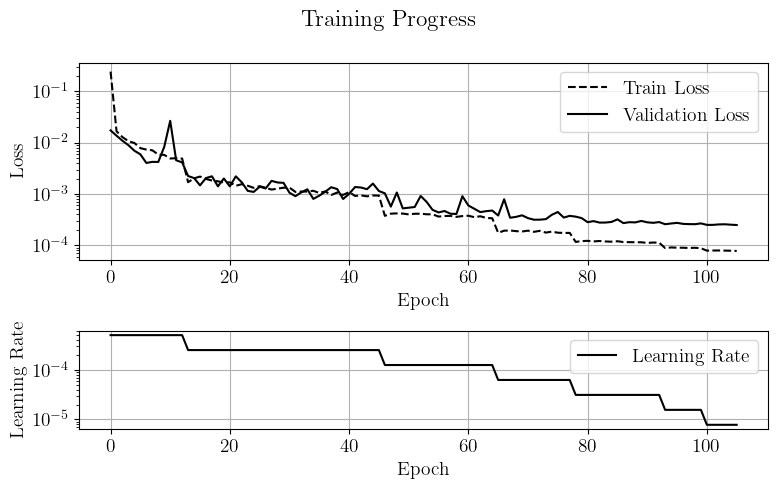

In [5]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 5), height_ratios=[1, 0.5])


# Plot primary y-axis (losses) on the first subplot
ax1.semilogy(data['epoch'], data['train_loss'],'--', label='Train Loss', color='k')
ax1.semilogy(data['epoch'], data['val_loss'],'-', label='Validation Loss', color='k')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper right')  # Legend for the first y-axis
ax1.grid(True)

# Plot secondary y-axis (learning rate) on the second subplot
ax2.semilogy(data['epoch'], data['lr'], 'k-', label='Learning Rate')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Learning Rate', color='k')
ax2.tick_params(axis='y', labelcolor='k')
ax2.legend(loc='upper right')  # Combine legends
ax2.grid(True)

plt.suptitle('Training Progress')
fig.tight_layout()
plt.show()



In [6]:
from src.models import model_loader
checkpoint = "/zhome/19/d/137388/github/DeepLearning_PAINN/examples/model_checkpoint.pth"

painn, metadata = model_loader.load_checkpoint(checkpoint)


Checkpoint loaded from /zhome/19/d/137388/github/DeepLearning_PAINN/examples/model_checkpoint.pth


/zhome/19/d/137388/github/DeepLearning_PAINN/src/models/model_loader.py:39: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(filepath)
